# Dimensionality Reduction with PCA

## Dimension Reduction

In this exercise, you are asked to use Principle Component Analysis (PCA) for model reduction. The goal of dimension reduction is to find a suitable transformation which converts a large dimensional space into a smaller feature space, such that the important information is not lost.

## The MNIST Dataset

We will use the MNIST digits dataset throughout this excercise. The MNIST dataset provides 60000 28x28 pixel grayscale training images of hand-written digits 0-9. The images are labeled with integer values 0-9. The training set has become the defacto image classification example due to its small size. For example, [follow the link](https://www.tensorflow.org/tutorials/) to see how to build a digit classifier with TensorFlow in less than 20 lines of code!

In this excercise, we are not interested in classifying images of digits. Instead, we will think of the images as defining a 28x28 = 784 element feature space. In this context, we are interested in transforming the 784 parameters into a smaller set of transformed coordinates. Before continuing to the next section, use the keras datasets module to load the MNIST dataset and get to know how it is structured.

- Inspect the dataset. What is the shape of x_train and y_train?
- Plot a few images using matplotlib.pyplot to see what they look like.

x_train shape: 
(60000, 28, 28)
y_train shape: 
(60000,)


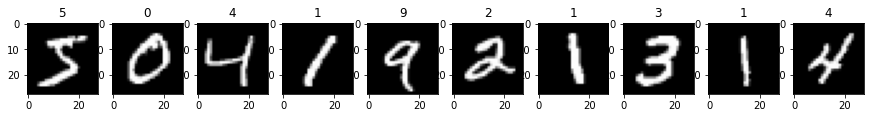

In [41]:
import tensorflow.keras.datasets.mnist as mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test  = x_test / 255

print("x_train shape: ")
print(x_train.shape)
print("y_train shape: ")
print(y_train.shape)

images = x_train[:10]
labels = y_train[:10]

fig, axes = plt.subplots(1, 10,  figsize=(15,15))
for i in range(10):
    axe = axes[i]
    axe.imshow(images[i], cmap='gray')
    axe.set_title(format(labels[i]))


## Principle Component Analysis (PCA)

The goal of PCA is to perform an orthogonal transformation which converts a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables, called _principal components_. This can be thought of as fitting an n-dimensional ellipsoid to the observations.  

Let's consider a dataset $X\in R^{n\times p}$, where $n$ is the number of observations and $p$ the number of variables. PCA transforms $X$ into a new coordinate system (new variable set), such that the greatest variance in the data is captured in the first coordinate, and then the second, and so on. More specifically, the transformed coordinates $T \in R^{n\times p}$ are written as a linear combination of the original dataset,

$$ T = X W, $$

where $W \in R^{p\times p}$ is the transformation matrix. The first column of $W$, denoted as $w_1$, is constructed to maximize the variance of the transformed coordinates.

$$ w_1 = \underset{\|w\|=1}{\operatorname{argmax}} \sum_{i=1}^{n} (t_1)_i^2 = \underset{\|w\|=1}{\operatorname{argmax}} \| X w \|_2^2 = \underset{\|w\|=1}{\operatorname{argmax}} \frac{w^T X^T X w}{w^T w} $$

The ratio in the last term is known as the _Rayleigh quotient_. It is well known that for the positive, semidefinite matrix $X^T X$, the largest value of the Rayleigh quotient is given as the largest eigenvalue of the matrix, where $w$ is eigenvector associated with that eigenvalue.

The remaining columns of $W$ can be found by finding the the next orthogonal linear combination which maximizes the variance of the data, minus the previously transformed coordinates.

$$ w_k = \underset{\|w\|=1}{\operatorname{argmax}} \| (X - \sum_{s=1}^{k-1} X w_s w_s^T) w \|^2_2 $$

Practically, the columns of $W$ are typically computed as the eigenvectors of $X^T X$ ordered by their corresponding eigenvalues in descending order.

### Singular Value Decomposition

The Singular Value Decomposition of a matrix $X \in R^{n\times p}$ is given as

$$ X = U \Sigma W^T, $$

where $\Sigma \in R^{n\times p}$ is a rectangular diagonal matrix of positive values known as the the singular values, of $X$, $\sigma(X)$, and $U \in R^{n\times n}$ and $W \in R^{p\times p}$ are orthonormal matrices, whose columns are the left and right (respectively) singular vectors of the matrix $X$.  Using this decomposition, we can easily see that

$$ X^T X = W \hat{\Sigma} W^T, $$

where $\hat{\Sigma}$ is a square diagonal matrix of the squared singular values of $X$. Comparing this to the eigenvalue decomposition of $X^T X = Q \Lambda Q^T$, we see that the singular values of $X$ represent the square-root of the eigenvalues of $X^T X$, and the singular vectors of $X$ are simply the eigenvectors of $X^T X$.  Therefore, we can compute perform PCA on a data matrix $X$ by computing its right singular vector matrix, $W$.

### Dimensionality Reduction

We can reduce the dimensionality of our data by truncating the transformed variables to include only a subset of those variables with the highest variance. For example, if we keep the first $L <= p$ variables, the reduced transformation reads

$$ T_L = X W_L, $$

where $W_L \in R^{n\times L}$ is the eigenvector matrix as before, but taking only the first $L$ columns. This technique has been widely used to reduce the dimension of large-dimensioned datasets by accounting for the directions of largest variance in the data, while neglecting the other directions. In addition, this can also be used to remove noise from a dataset, in which it is assumed that the noise accounts for a small degree of variance, compared to the true underlying parameterization. Finally, using PCA to find the 2 highest varying parameters can also allow us to visualize a high-dimensional dataset. Let's do this now on the MNIST images.

- Use numpy to [compute the SVD](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html) of the MNIST images. Note, you will first need to reshape the array to 2D with n = 60000 and p = 28 x 28 = 784.
- Compute the first two principle components by truncating the eigenvector matrix before multiplying by the data array.
- Plot the two principle components on a scatter plot with matplotlib.pyplot.scatter, using the image labels to color the markers.
- What do you notice about the how the data is presented in the plot?
- Which images form a tight cluster in the reduced space?

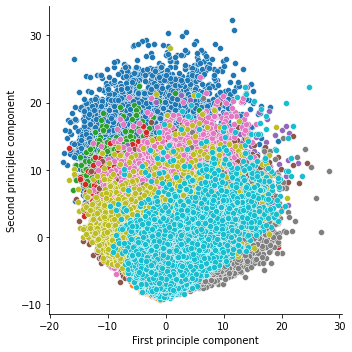

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh

x_train = np.reshape(x_train,(60000,784))

u,s,vh = np.linalg.svd(x_train, full_matrices=False)

X = StandardScaler().fit_transform(x_train)

values, vectors = eigh(np.matmul(X.T, X), eigvals = (782, 783))

T = np.vstack((np.matmul(vectors.T, X.T), y_train)).T

dataFrame = pd.DataFrame(T, columns = ['First principle component', 'Second principle component', 'Marker'])

sns.FacetGrid(dataFrame, hue = 'Marker', height= 5).map(sns.scatterplot, 'First principle component', 'Second principle component')
plt.show()

### Scree Plot

It is not always clear how many principle components are necessary to accurately represent the high-dimensional space.  There are two widely used methods to help us get a sense of the number variables required.  The first is called a [Scree plot](https://en.wikipedia.org/wiki/Scree_plot), which plots the eigenvalues of $X^T X$ in descending order.  Since the eigenvalues represent the degree of variance in the corresponding principle components, such a plot can tell use how many components are needed before we reach diminishing returns.

- Plot the Scree plot for the MNIST data.
- How many principle components are needed to represent most of the variance.

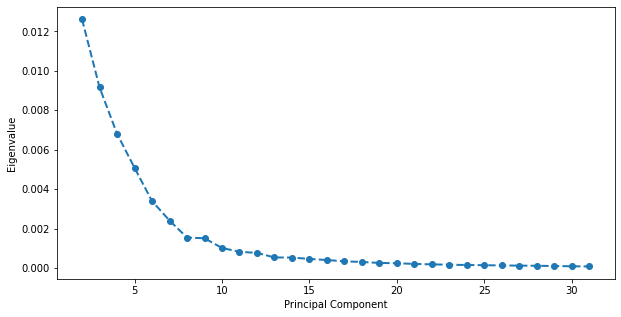

In [62]:
N = np.matrix(x_train.T) * np.matrix(x_train) 
A,B,C = np.linalg.svd(N)
eigenValues = B ** 2 / np.sum(B ** 2)

figure = plt.figure(figsize=(10, 5))
singularValues = np.arange(len(eigenValues)) + 1

singularValuesPlot = [0] * 30
eigenValuesPlot = [0] * 30
for i in range(0, 30):
  singularValuesPlot[i] = singularValues[i + 1]
  eigenValuesPlot[i] = eigenValues[i + 1]

plt.plot(singularValuesPlot, eigenValuesPlot, 'o--', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue') 
plt.show() 

### Total Variance Explained

Another method is called _Total Variance Explained_. In this method, we plot the cumulative sum of the eigenvalues and choose the number of components which give us a certain percentage fo the total variance.

- Plot the cumulative sum of the eigenvalues.
- Plot a horizontal line at 95% of the total sum.
- Based on this, how many components are needed to capture 95% of the variance?
- How does this compare to the Scree plot result?

Number of components capturing 95% of the variance: 
330


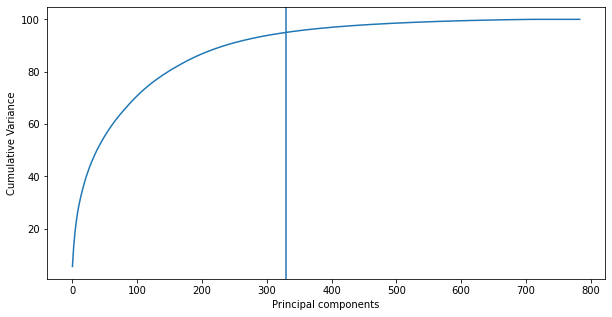

In [66]:
from sklearn import decomposition

pca = decomposition.PCA()
dataFrameScaled = pd.DataFrame(StandardScaler().fit_transform(X))
dataFramePCA = pd.DataFrame(pca.fit_transform(dataFrameScaled))

cumSum = np.cumsum(pca.explained_variance_ratio_) * 100
numOfMainComponents = np.argmax(cumSum >= 95)

plt.figure(figsize=[10, 5])
plt.ylabel('Cumulative Variance')
plt.xlabel('Principal components')
plt.axvline(x = numOfMainComponents)
plt.plot(cumSum)

print("Number of components capturing 95% of the variance: ")
print(numOfMainComponents)

### Reconstruct Images

Now that we have an idea of how many principle components are necessary, let's use them to encode the images in a smaller set of features, which we can then decode to reconstruct the images from the lower-dimensional space.  Recall that based on the PCA transformation, we can compute the reconstructed images with

$$ \hat{X} = (X W_L) W_L^T $$

- Create a grid of images using pyplot.subplots and imshow.
  - In the first row, plot the first 5 images of the dataset.
  - In the next 4 rows, plot reconstructions of the images using the first 5, 15, 30, and 100 principle component vectors.
- How do the reconstructed images compare with the originals as you increase the size of the reduced space?

Note that once we have computed the transformation matrix $W$, we essentially have a compression scheme to convert our images into a compressed format. From this perspective, using the first 5, 10, 30, and 100 principle components is equivalent to compressing the data at a rate of 156:1, 78:1, 26:1, and 8:1, respectively. By contrast, JPEG image compression can obtain compression ratios of 23:1 with reasonable image quality, surpassing the quality of reconstructions with PCA. For that reason, PCA is not really used for image compression, but it has been used in a number of other fields, particularly in physics and engineering.

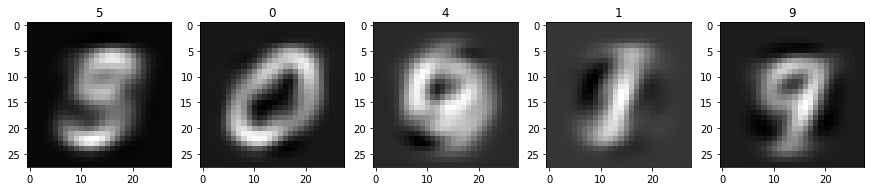

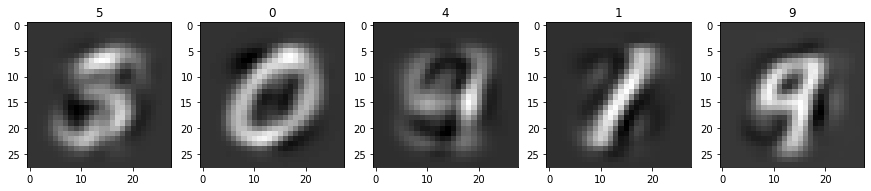

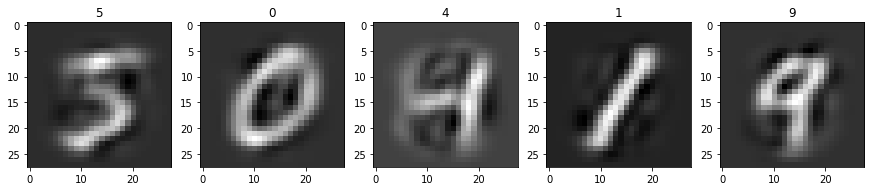

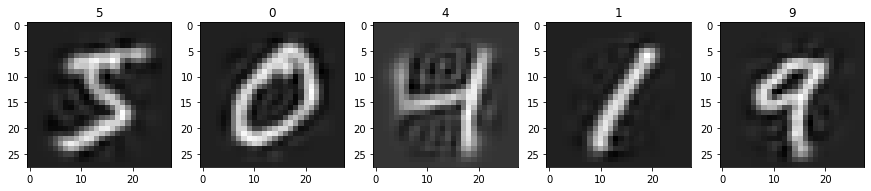

In [73]:
from sklearn.decomposition import  IncrementalPCA

def plot_at_principleComponentVector(numOfMainComponents):
  
  incrementalPCA = IncrementalPCA(n_components = numOfMainComponents)
  imageTransform = incrementalPCA.inverse_transform(incrementalPCA.fit_transform(x_train))
  imageTransform = np.reshape(imageTransform,(60000,28,28))
  images = imageTransform[:5]
  labels = y_train[:5]
  fig, axes = plt.subplots(1, 5, figsize=(15, 15))
  for i in range(5):
    axe = axes[i]
    axe.imshow(images[i], cmap='gray')
    axe.set_title(format(labels[i]))

principleComponentVector = [5, 15, 30, 100]

for i in range(0, 4):
    plot_at_principleComponentVector(principleComponentVector[i])
plt.show()